In [1]:
# Imports
import numpy as np
import requests
import pandas as pd
from data_classes import IncomeData
from os import makedirs, path, listdir, remove
from tqdm import tqdm
import zipfile as zpf
import matplotlib.pyplot as plt
import xlrd
from openpyxl import load_workbook
import wandb

In [186]:
url = "https://www.ons.gov.uk/file?uri=/economy/regionalaccounts/grossdisposablehouseholdincome/datasets/regionalgrossdisposablehouseholdincomebylocalauthoritiesbynuts1region/ukilondon/regionalgrossdisposablehouseholdincomelocalauthorityukilondon.xls"

In [2]:
income = IncomeData()

In [140]:
income.download_and_log(url, "London")

In [162]:
df = income.read("income-raw")

In [175]:
df.shape

(22, 33)

#### Linear interpolation of annual data

In [3]:
key = "D"
method = "linear"
linear_df = income.resample_time_and_log(key, method)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: michellewl (use `wandb login --relogin` to force relogin)


In [199]:
linear_df = income.read("income-resample")

In [4]:
linear_df.shape

(7671, 33)

<AxesSubplot:>

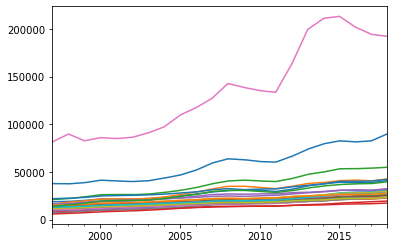

In [9]:
linear_df.plot(legend=False) # City of London is the really high pink line!